In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [71]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [72]:
qmcE_m1545 = np.array(df["energy"])[np.where(df["delta"]==delta_m1545)]
Eerr_m1545 = np.array(df["energy_error"])[np.where(df["delta"]==delta_m1545)]
qmcE_4455 = np.array(df["energy"])[np.where(df["delta"]==delta_4455)]
Eerr_4455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4455)]
qmcE_4955 = np.array(df["energy"])[np.where(df["delta"]==delta_4955)]
Eerr_4955 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4955)]
qmcE_13455 = np.array(df["energy"])[np.where(df["delta"]==delta_13455)]
Eerr_13455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_13455)]

In [8]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [57]:
def ma(values):
    weights = np.repeat(1.0, 25)/25
    sma = np.convolve(values, weights, 'valid')
    return sma

# Figure 4a

In [10]:
def GetBestEs1(delta,moving_avg_fxn,window):
    
    # Read in data
    VMC_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    Data_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/Exp_data/Energy.npy')
    Hybrid_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/hybrid_train/1000_ds/lr_5e-05/Energy.npy')

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    Data_E = np.min(moving_avg_fxn(Data_train1,window))
    Hybrid_E = np.min(moving_avg_fxn(Hybrid_train1,window))
    
    return VMC_E, Data_E, Hybrid_E

In [22]:
vmces1 = []
dataes1 = []
hyes1 = []

for delta_ in deltas:
    vmce1, datae1, hye_1 = GetBestEs1(delta_,movingaverage,25)
    vmces1.append(vmce1)
    dataes1.append(datae1)
    hyes1.append(hye_1)


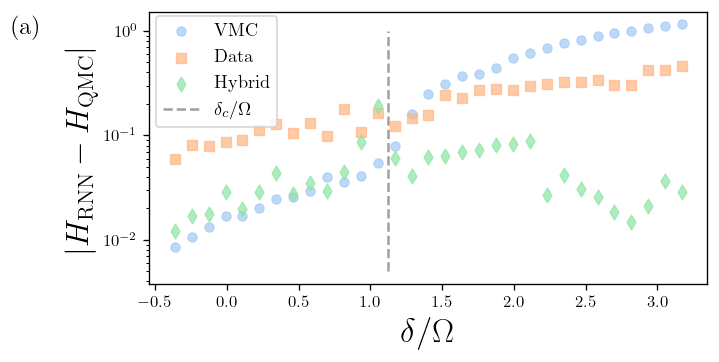

In [36]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,3), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')

plt.scatter(deltas/4.24,abs(vmces1-energies),marker = 'o',color=colors1[0],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[0],label="VMC")
plt.scatter(deltas/4.24,abs(dataes1-energies),marker = 's',color=colors1[1],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[1],label="Data")
plt.scatter(deltas/4.24,abs(hyes1-energies),marker = 'd',color=colors1[2],s=40,alpha=0.7,linewidths=0.8,edgecolors=colors1[2],label="Hybrid")
plt.vlines(4.765/4.24,0.005,1,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')
plt.legend(loc='center', bbox_to_anchor=(0.12, 0.78),fontsize=11)
plt.text(-1.5, 0.95, "(a)",fontsize=15)
plt.ylabel('$|H_{\mathrm{RNN}} - H_{\mathrm{QMC}}|$',fontsize=19)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.yscale('log')
plt.show()

In [24]:
def GetBestEs2(delta,moving_avg_fxn,window):
    
    # Read in data
    VMC_train1 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    Data_train1 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/Exp_data/Energy.npy')
    Hybrid_train1 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/hybrid_train/100_ds/lr_0.001/Energy.npy')

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    Data_E = np.min(moving_avg_fxn(Data_train1,window))
    Hybrid_E = np.min(moving_avg_fxn(Hybrid_train1,window))
    
    return VMC_E, Data_E, Hybrid_E

In [25]:
vmces2 = []
dataes2 = []
hyes2 = []

for delta_ in deltas:
    vmce2, datae2, hye2 = GetBestEs2(delta_,movingaverage,25)
    vmces2.append(vmce2)
    dataes2.append(datae2)
    hyes2.append(hye2)

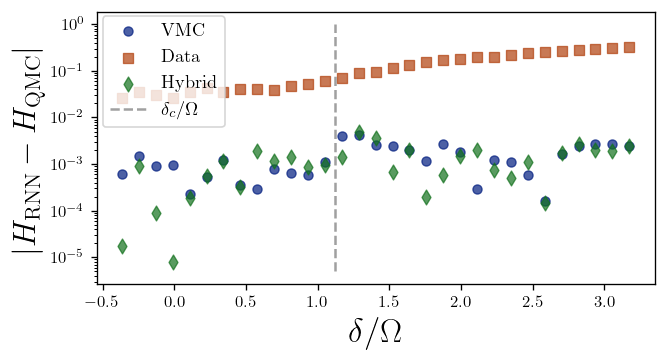

In [35]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,3), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('dark')

plt.scatter(deltas/4.24,abs(vmces2-energies),marker = 'o',color=colors1[0],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[0],label="VMC")
plt.scatter(deltas/4.24,abs(dataes2-energies),marker = 's',color=colors1[1],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[1],label="Data")
plt.scatter(deltas/4.24,abs(hyes2-energies),marker = 'd',color=colors1[2],s=40,alpha=0.7,linewidths=0.8,edgecolors=colors1[2],label="Hybrid")
plt.vlines(4.765/4.24,0.000005,1,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')
plt.legend(loc='center', bbox_to_anchor=(0.12, 0.78),fontsize=11)
plt.ylabel('$|H_{\mathrm{RNN}} - H_{\mathrm{QMC}}|$',fontsize=19)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.yscale('log')
plt.show()

# Figure 4b

In [76]:
d_m1545_2d_VMC = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_-1.545/seed_111/vmc_only/Energy.npy')

d_m1545_2d_data = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_-1.545/seed_111/Exp_data/Energy.npy')

d_m1545_2d_hybrid = np.atleast_2d(np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_-1.545/seed_111/hybrid_train/40_ds/lr_0.001/Energy.npy'))
for ds in np.arange(40,201,20):
    d_m1545_2d_hybrid = np.append(d_m1545_2d_hybrid,np.atleast_2d(np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_-1.545/seed_111/hybrid_train/{ds}_ds/lr_0.001/Energy.npy')[0:3000,]),axis=0)

In [77]:
d_4455_2d_VMC = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.455/seed_111/vmc_only/Energy.npy')

d_4455_2d_data = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.455/seed_111/Exp_data/Energy.npy')

d_4455_2d_hybrid = np.atleast_2d(np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.455/seed_111/hybrid_train/40_ds/lr_0.001/Energy.npy'))
for ds in np.arange(40,201,20):
    d_4455_2d_hybrid = np.append(d_4455_2d_hybrid,np.atleast_2d(np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_4.455/seed_111/hybrid_train/{ds}_ds/lr_0.001/Energy.npy')[0:3000,]),axis=0)

In [78]:
d_4955_2d_VMC = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.955/seed_111/vmc_only/Energy.npy')

d_4955_2d_data = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.955/seed_111/Exp_data/Energy.npy')

d_4955_2d_hybrid = np.atleast_2d(np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_4.955/seed_111/hybrid_train/40_ds/lr_0.001/Energy.npy'))
for ds in np.arange(40,201,20):
    d_4955_2d_hybrid = np.append(d_4955_2d_hybrid,np.atleast_2d(np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_4.955/seed_111/hybrid_train/{ds}_ds/lr_0.001/Energy.npy')[0:3000,]),axis=0)

In [79]:
d_13455_2d_VMC = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/vmc_only/Energy.npy')

d_13455_2d_data = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/Exp_data/Energy.npy')

d_13455_2d_hybrid = np.atleast_2d(np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/hybrid_train/40_ds/lr_0.001/Energy.npy'))
for ds in np.arange(40,201,20):
    d_13455_2d_hybrid = np.append(d_13455_2d_hybrid,np.atleast_2d(np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/hybrid_train/{ds}_ds/lr_0.001/Energy.npy')[0:3000,]),axis=0)

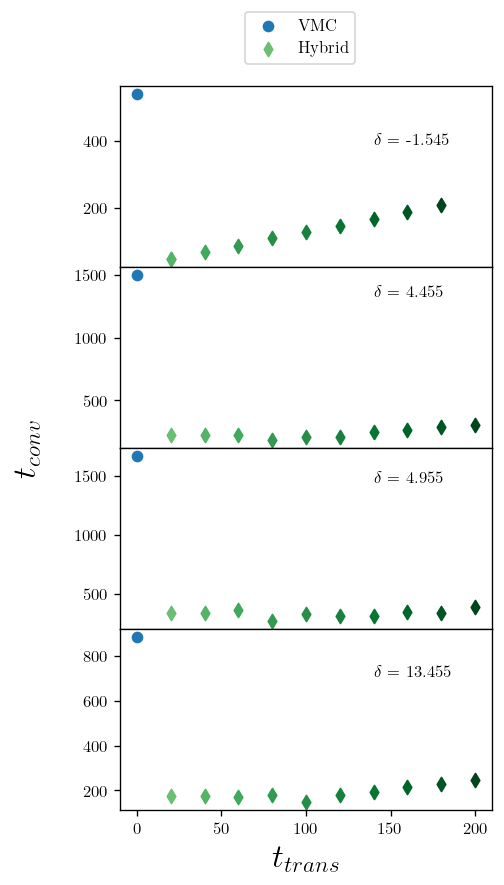

In [85]:
fig = plt.figure(1,figsize=(4,8), dpi=120, facecolor='w', edgecolor='k')
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0],sharex=ax1)
ax3 = fig.add_subplot(grid[2,0],sharex=ax1)
ax4 = fig.add_subplot(grid[3,0],sharex=ax1)
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
thresh = 0.01
ds_start = 20
ds_step = 20

# delta=-1.545
ax1.text(140, 390, "$\\delta$ = -1.545",fontsize=10)
tconv_VMC1 = np.where(ma(d_m1545_2d_VMC)<=qmcE_m1545+thresh)[0][0]
ax1.scatter(0,tconv_VMC1,marker='o',color='C0',label="VMC")
num_trains = np.shape(d_m1545_2d_hybrid)[0]
ds = ds_start
tconv = np.where(ma(d_m1545_2d_hybrid[0,:])<=qmcE_m1545+thresh)[0][0]
ax1.scatter(ds,tconv,marker = 'd',color=greens[0],label=f'Hybrid')
for i in range(1,num_trains):
    tconv = np.where(ma(d_m1545_2d_hybrid[i,:])<=qmcE_m1545+thresh)[0][0]
    ax1.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
# delta=4.455
ax2.text(140, 1325, "$\\delta$ = 4.455",fontsize=10)
tconv_VMC2 = np.where(ma(d_4455_2d_VMC)<=qmcE_4455+thresh)[0][0]
ax2.scatter(0,tconv_VMC2,marker='o',color='C0')
num_trains = np.shape(d_4455_2d_hybrid)[0]
ds = ds_start
for i in range(num_trains):
    tconv = np.where(ma(d_4455_2d_hybrid[i,:])<=qmcE_4455+thresh)[0][0]
    ax2.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step

# delta=4.955
ax3.text(140, 1440, "$\\delta$ = 4.955",fontsize=10)
tconv_VMC3 = np.where(ma(d_4955_2d_VMC)<=qmcE_4955+thresh)[0][0]
ax3.scatter(0,tconv_VMC3,marker='o',color='C0')
num_trains = np.shape(d_4955_2d_hybrid)[0]
ds = ds_start
for i in range(0,num_trains):
    tconv = np.where(ma(d_4955_2d_hybrid[i,:])<=qmcE_4955+thresh)[0][0]
    ax3.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
# delta=13.455
ax4.text(140, 710, "$\\delta$ = 13.455",fontsize=10)
tconv_VMC4 = np.where(ma(d_13455_2d_VMC)<=qmcE_13455+thresh)[0][0]
ax4.scatter(0,tconv_VMC4,marker='o',color='C0')
num_trains = np.shape(d_13455_2d_hybrid)[0]
ds = ds_start
for i in range(num_trains):
    tconv = np.where(ma(d_13455_2d_hybrid[i,:])<=qmcE_13455+thresh)[0][0]
    ax4.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
    
fig.legend(loc='center', bbox_to_anchor=(0.5, 0.93))
plt.xlabel('$ t_{trans} $',fontsize=20)
fig.text(-0.1, 0.5, '$t_{conv}$', va='center', rotation='vertical',fontsize=20)
plt.show()

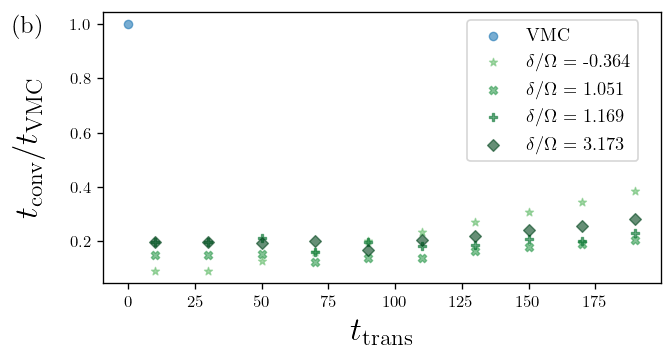

In [82]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,3), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
thresh = 0.01
ds_start = 10
ds_step = 20

# delta=-1.545
tconv_VMC1 = np.where(ma(d_m1545_2d_VMC)<=qmcE_m1545+thresh)[0][0]
plt.scatter(0,1,marker='o',color='C0',s=25,alpha=0.6,linewidths=0.8,edgecolors='C0',label="VMC")
num_trains = np.shape(d_m1545_2d_hybrid)[0]
ds = ds_start
tconv = np.where(ma(d_m1545_2d_hybrid_sm[0,:])<=qmcE_m1545+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC1,marker = '*',color=greens[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[0],label=f'$\\delta/\\Omega$ = -0.364')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_m1545_2d_hybrid_sm[i,:])<=qmcE_m1545+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC1,marker = '*',color=greens[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[0])
    ds+=ds_step
    
# delta=4.455
tconv_VMC2 = np.where(ma(d_4455_2d_VMC)<=qmcE_4455+thresh)[0][0]
num_trains = np.shape(d_4455_2d_hybrid)[0]
ds = ds_start
tconv = np.where(ma(d_4455_2d_hybrid[0,:])<=qmcE_4455+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC2,marker = 'X',color=greens[3],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[3],label=f'$\\delta/\\Omega$ = 1.051')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_4455_2d_hybrid[i,:])<=qmcE_4455+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC2,marker = 'X',color=greens[3],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[3])
    ds+=ds_step

# delta=4.955
tconv_VMC3 = np.where(ma(d_4955_2d_VMC)<=qmcE_4955+thresh)[0][0]
num_trains = np.shape(d_4955_2d_hybrid)[0]
ds = ds_start
tconv = np.where(ma(d_4955_2d_hybrid[0,:])<=qmcE_4955+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC3,marker = 'P',color=greens[6],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[6],label=f'$\\delta/\\Omega$ = 1.169')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_4955_2d_hybrid[i,:])<=qmcE_4955+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC3,marker = 'P',color=greens[6],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[6])
    ds+=ds_step
    
# delta=13.455
tconv_VMC4 = np.where(ma(d_13455_2d_VMC)<=qmcE_13455+thresh)[0][0]
num_trains = np.shape(d_13455_2d_hybrid)[0]
ds = ds_start
tconv = np.where(ma(d_13455_2d_hybrid[0,:])<=qmcE_13455+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC4,marker = 'D',color=greens[9],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[9],label=f'$\\delta/\\Omega$ = 3.173')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_13455_2d_hybrid[i,:])<=qmcE_13455+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC4,marker = 'D',color=greens[9],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[9])
    ds+=ds_step

fig.legend(loc='center',bbox_to_anchor=(0.75, 0.66),fontsize=11)
plt.text(-43, 0.97, "(b)",fontsize=15)
plt.xlabel('$ t_{\mathrm{trans}} $',fontsize=20)
fig.text(-0.001, 0.5, '$t_{\mathrm{conv}}/t_{\mathrm{VMC}}$', va='center', rotation='vertical',fontsize=20)
plt.show()